## Исследование поведения доверительных интервалов для нормального распределения и распределения $X^2$
### Дятлова Дарья, 1 курс МОиАД ВШЭ¶

In [13]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

#### Напишем функции для вычисления квантиля распределения для нормального распределения и распределения $X^2$

In [75]:
def normal_dist(p, eps = 1e-8):
    r = 1e5
    l = -r
    while r - l > eps:
        x = (l + r) / 2
        if st.norm.cdf(x) >= p:
            r = x
        else:
            l = x
    return (r + l) / 2

def chi2_dist(n, p, eps = 1e-8):
    l, r = 0, 1e6
    while r - l > eps:
        x = (l + r) / 2
        if st.chi2.cdf(x, n) >= p:
            r = x
        else:
            l = x
    return (r + l) / 2

#### Теперь напишем функцию для вычисления доверительного интервала: ($\sum \frac{X^2_k}{\lambda_{(1 + \gamma)/2}}$, $\sum \frac{X^2_k}{\lambda_{(1 - \gamma)/2}}$)

In [51]:
def interval1(n, gamma):
    d = 1
    X = np.random.default_rng().normal(0, d, n)
    q1 = chi2_dist(n, (1 + gamma) / 2, eps = 1e-8)
    q2 = chi2_dist(n, (1 - gamma) / 2, eps = 1e-8)
    l = np.sum(np.square(X)) / q1
    r = np.sum(np.square(X)) / q2
    
    return l, r

#### Построим графики зависимости начала и конца интервала от размера выборки и график зависимости длины отерзка при $\gamma = 0.95$.

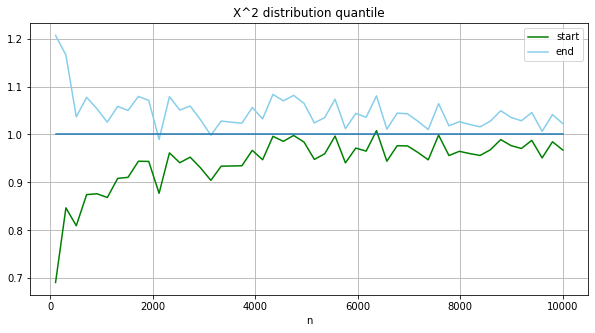

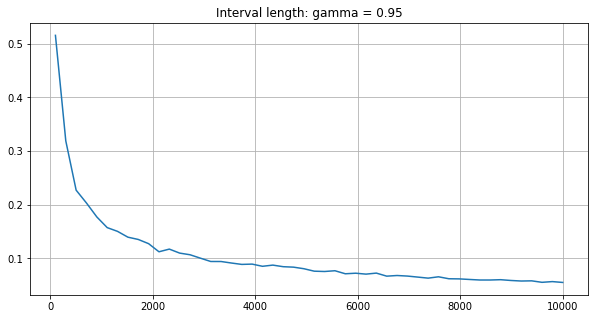

In [141]:
gamma = 0.95
n = np.linspace(100, 10000, 50)
start = [0 for i in range(len(n))]
end = [0 for i in range(len(n))]
dist = [0 for i in range(len(n))]

for i, j in enumerate(n):
    start[i], end[i] = interval1(int(j), gamma)
    dist[i] = end[i] - start[i]

plt.figure(figsize=(10,5))
plt.grid(True)
plt.title('X^2 distribution quantile')
plt.xlabel('n')
x = plt.plot(n, start, label='start', c="green")
x = plt.plot(n, end, label='end', c="skyblue")
plt.plot(n, [1] * len(n))
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.grid(True)
y = plt.title('Interval length: gamma = 0.95')
plt.plot(n, dist)
plt.show()

#### Заметим, что доверительный интервал сужается с увеличением выборки, сами же значения колебляться в интервале (0.7, 1.3) т.е. в районе значения дисперсии. 

#### Запишем идентичную функцию для интервала: $(\frac{\bar nX^2}{z^2_{(3 + \gamma) / 4}}, \frac{\bar nX^2}{z^2_{(3 - \gamma) / 4}})$, также построим графики

In [84]:
def interval2(n, gamma):
    
    d = 1 
    X = np.random.default_rng().normal(0, d, n)
    q1 = normal_dist((3 + gamma) / 4)
    q2 = normal_dist((3 - gamma) / 4)
    l = n * (np.mean(X) ** 2) / q1**2
    r = n * (np.mean(X) ** 2) / q2**2
    
    return l, r

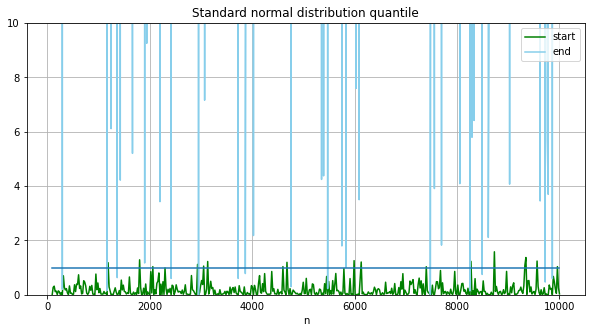

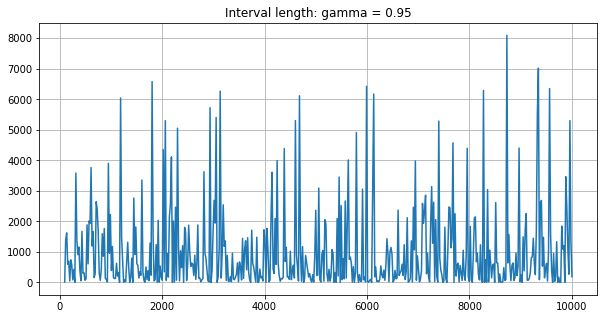

In [142]:
gamma = 0.95
n = np.linspace(100, 10000, 500, dtype = int)

start1 = [0 for i in range(len(n))]
end1 = [0 for i in range(len(n))]
dist = [0 for i in range(len(n))]

for i, j in enumerate(n):
    start1[i], end1[i] = interval2(int(j), gamma)
    dist[i] = end1[i] - start1[i]
    
plt.figure(figsize=(10,5))
plt.grid(True)
plt.title('Standard normal distribution quantile')
plt.xlabel('n')
plt.ylim((0, 10))
plt.plot(n, start1, label='start', c="green")
plt.plot(n, end1, label='end', c="skyblue")
plt.plot(n, [1] * len(n))
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.grid(True)
plt.title('Interval length: gamma = 0.95')
plt.plot(n, dist)
plt.show()

#### В случе с квантилями порядка 0.95 стандартного нормального распределения доверительный интервал не сужается с ростом n. По нижним границам интервалов видим, что вероятность попадания дисперсии в интервал $\approx \gamma$